In [1]:
import sys

PWD = '..'
sys.path.append(PWD)

import numpy as np

from matplotlib import pyplot as plt

from src.plot_utils import plot_sample
from src.cfd import CFD
from src.cfd_utils import calculate_event_cfd, find_diff_hist_stats

# Load data

In [2]:
file_name = 'Ntuple_runsampic_166_runtelescope_643_filtered.npz'
all_events = np.load(f'{PWD}/data/{file_name}', allow_pickle=True)['arr_0'].flat[0]

all_events.keys()

dict_keys([17, 11, 23, 16, 24, 29, 28, 22, 10])

# Timestamp difference

17...
Best: fraction=0.25, std=0.0702 (mean=0.1733)


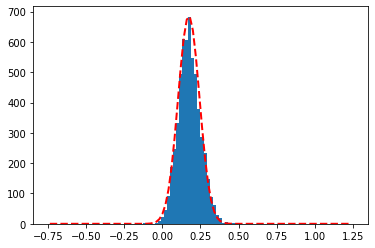

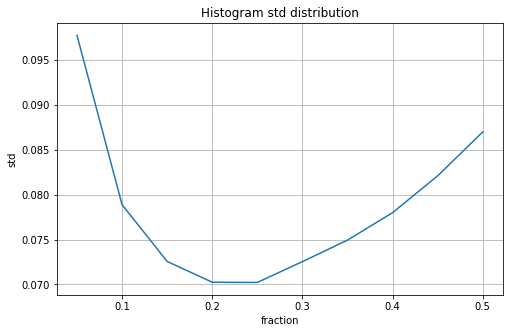

11...
Best: fraction=0.30, std=0.0641 (mean=0.1983)


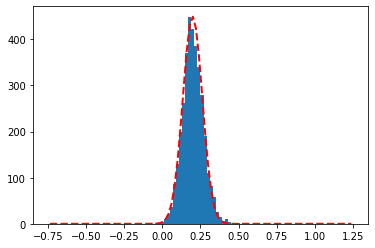

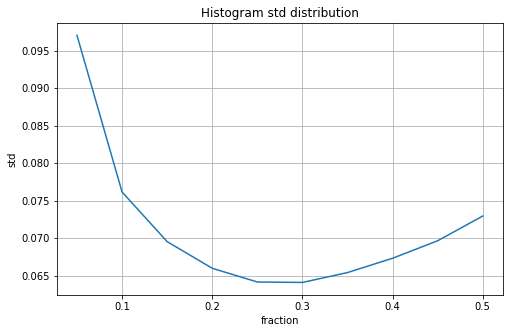

23...
Best: fraction=0.25, std=0.0611 (mean=-0.1956)


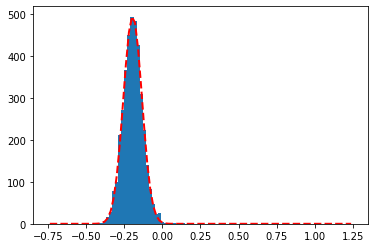

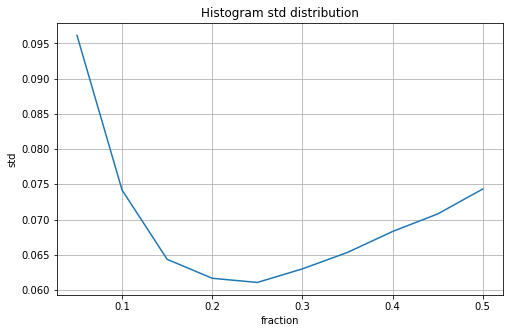

16...
Best: fraction=0.25, std=0.0673 (mean=0.2784)


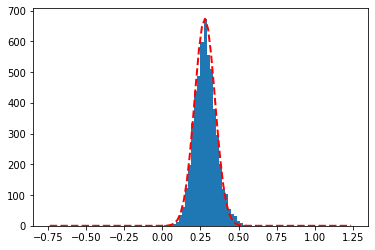

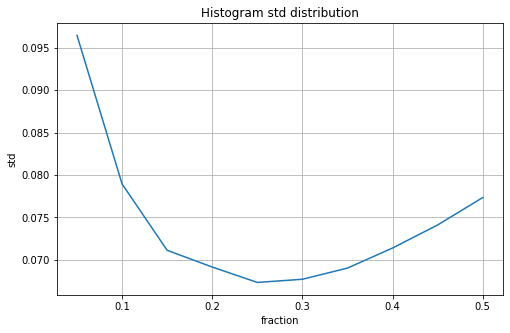

24...
Best: fraction=0.20, std=0.0895 (mean=-0.0936)


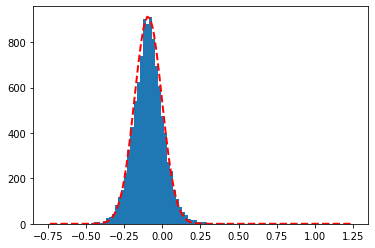

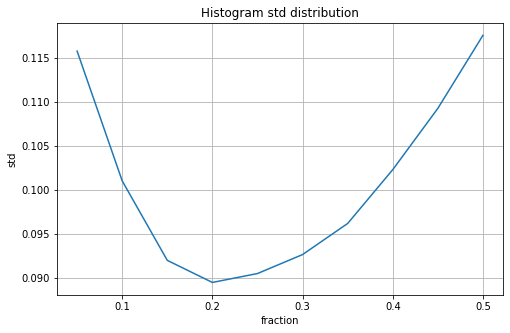

29...
Best: fraction=0.30, std=0.0679 (mean=-0.3394)


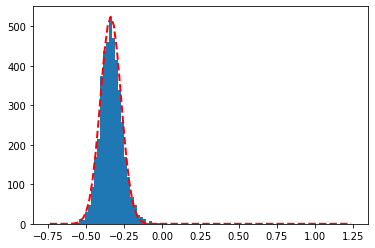

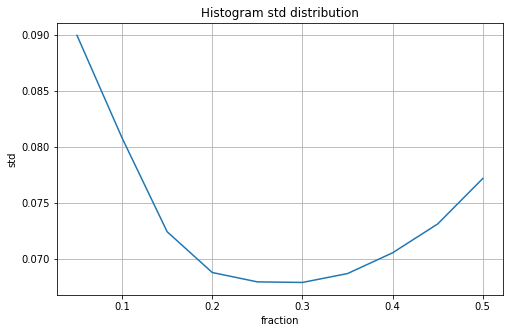

28...
Best: fraction=0.20, std=0.0745 (mean=-0.3330)


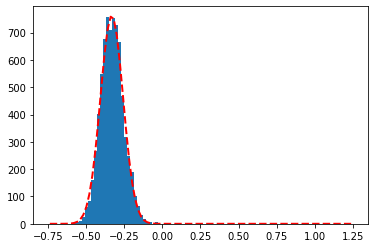

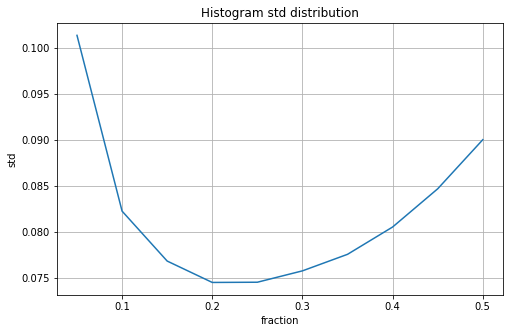

22...
Best: fraction=0.25, std=0.0611 (mean=-0.2006)


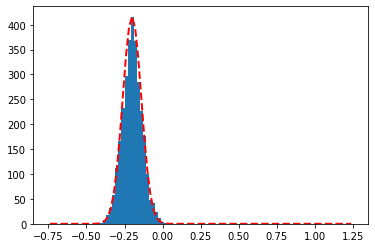

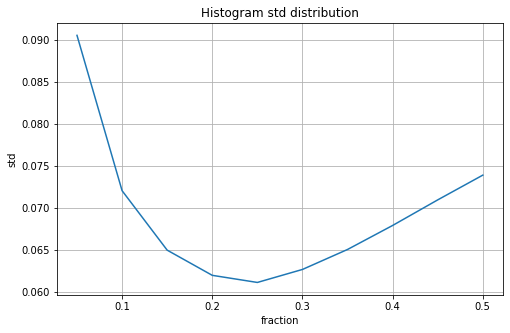

10...
Best: fraction=0.25, std=0.0634 (mean=0.0801)


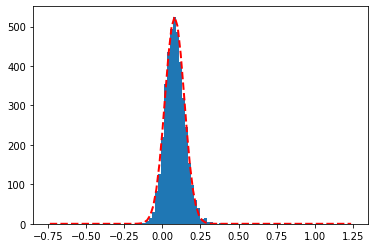

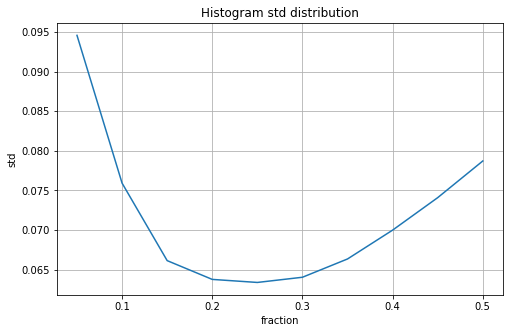

In [3]:
X_RANGE = np.arange(0.05, 0.51, 0.05)
best_fractions = {}

for channel, events in all_events.items():
    print(f'{channel}...')
    cfd = CFD()
    means = []
    stds = []
    
    for frac in X_RANGE:
        cfd.fraction = frac
        mean, std = find_diff_hist_stats(cfd, events, show=False, hist_range=(-0.75, 1.25), hist_alpha=0.8, hist_label=f'{frac:0.2f}', plot_gauss=False)
        # print(f'fraction={frac:0.2f}, std={std:0.4f}')
        means.append(mean)
        stds.append(std)
        plt.close()
        
    stds = np.array(stds)
    best_idx = np.argmin(stds)
    print(f'Best: fraction={X_RANGE[best_idx]:0.2f}, std={stds[best_idx]:0.4f} (mean={means[best_idx]:0.4f})')
    best_fractions[channel] = X_RANGE[best_idx]
    
    cfd.fraction = best_fractions[channel]
    find_diff_hist_stats(cfd, events, show=True, hist_range=(-0.75, 1.25), hist_label=f'{frac:0.2f}', plot_gauss=True)
    
    plt.figure(figsize=(8, 5))
    plt.plot(X_RANGE, stds)
    plt.title('Histogram std distribution')
    plt.xlabel('fraction')
    plt.ylabel('std')
    plt.grid()
    plt.show()
    
    print('=======================================================================================================')